In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
url = 'https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id
df = pd.read_csv(dwn_url)

## Q1Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [2]:
# Preprocess dataset
df = df.dropna()
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])
X = df.drop('target', axis=1)
y = df['target']

## Q2. Split the dataset into a training set (70%) and a test set (30%).


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [4]:
# Train model
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [5]:
y_pred = rfc.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.8241758241758241
Precision: 0.8695652173913043
Recall: 0.8
F1 Score: 0.8333333333333333


## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart

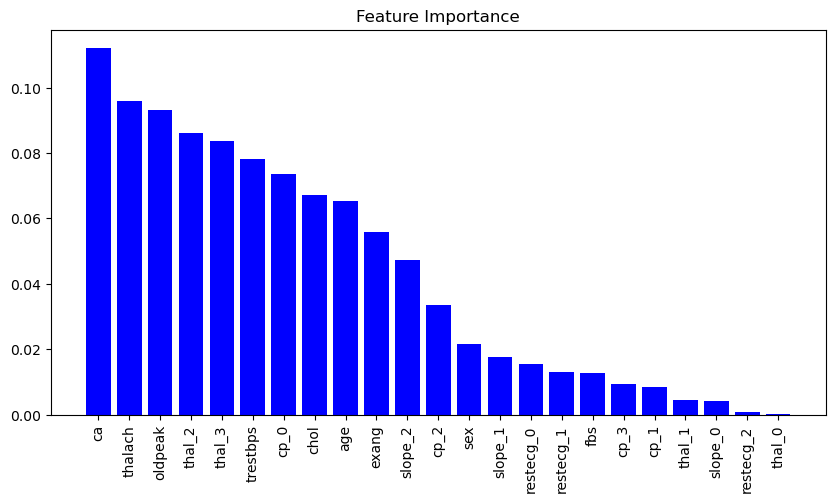

In [6]:
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(len(indices)), importances[indices], color='b')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.show()

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [7]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [ ]:
rfc_random = RandomizedSearchCV(estimator=rfc,
                                param_distributions=param_dist,
                                n_iter=100,
                                cv=5,
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)

rfc_random.fit(X_train, y_train)

print('Best hyperparameters:', rfc_random.best_params_)
print('Accuracy:', rfc_random.best_score_)